In [215]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#set ranges for search years
start_range = np.arange(1982, 2015, 2)
end_range = np.arange(1983, 2016, 2)

In [164]:
#set empty list to hold tables
df_list = []

#loop over lotto tables
for i, j in zip(start_range, end_range):
    #read table
    table = pd.read_html(f'http://www.lotto649stats.com/winning-numbers-{i}-{j}.html')
    #create df and extract dates
    df = pd.DataFrame(table[0])
    df = df.iloc[4:,].iloc[:,:8]
    #add each df to holding list
    df_list.append(df)
    
#concat list together, drop NA's and rename Date column
df_master = pd.concat(df_list)
df_past = df_master.dropna(axis=0).rename(columns={0:'Date'}).copy()

In [167]:
def get_current():
    #returns current lotto results in dataframe
    #grab table
    table = pd.read_html('http://www.lotto649stats.com/recent_winning.html')
    #extract just the information we want
    df = pd.DataFrame(table[0])
    df = df.iloc[4:,].iloc[:,:8]
    print(df.head(5))
    #reverse the order, replace column with date
    df = df.iloc[::-1,:].reset_index().drop('index', axis=1)
    df = df.dropna(axis=0).rename(columns={0:'Date'})
    print(df.head(5))
    #return df as a variable
    return df

#create df variable
df_current = get_current()

                    0   1   2   3   4   5   6   7
4  September 15, 2018   3   4  18  24  32  36  19
5  September 12, 2018  14  21  27  32  35  43  41
6   September 8, 2018   8  10  31  41  46  47  45
7   September 5, 2018   4   6  15  32  36  47  48
8   September 1, 2018   8  12  15  34  37  44  45
                 Date   1   2   3   4   5   6   7
0  September 19, 2015  12  15  17  21  25  32  14
1  September 23, 2015   7  13  19  35  42  44  46
2  September 26, 2015   6  13  14  24  32  34  12
3  September 30, 2015   1   6   8  13  21  26   3
4     October 3, 2015   1   3  15  27  31  36  33


In [312]:
#create final dataframe with everything
df_final = df_past.append(df_current, ignore_index=True)
#create file in directory
#df_final.to_csv('lotto_final_19_08_18.csv')

In [328]:
#create day number - Saturday = 0, Wednesday = 1
df_final['temp_date'] = pd.to_datetime(df_final['Date'])
df_final['day_rank'] = df_final['temp_date'].dt.day_name()
df_final['day'] = np.where(df_final['day_rank'] == 'Saturday', 0, 1)
df_final['day_of_month'] = df_final['temp_date'].apply(lambda x: x.day)
df_final = df_final.drop(['Date', 'temp_date', 'day_rank'], axis=1)

In [329]:
df_final.head(5)

,1,2,3,4,5,6,7,day,day_of_month
0,11,18,22,28,35,37,42,0,25
1,7,13,23,32,33,45,36,0,18
2,4,9,10,11,43,46,3,0,11
3,6,17,24,36,38,46,29,0,4
4,5,17,21,28,30,43,36,0,27


In [330]:
from scipy import stats
from sklearn.svm import SVC
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

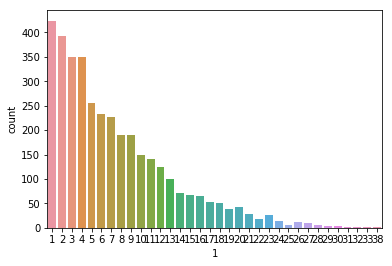

In [340]:
sns.countplot(y)

Run a separate classification on each feature 

In [362]:
#model #1
# set features
X = df_final.drop('day_of_month', axis=1)
# set independent variable
y = df_final['day_of_month']
#split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [364]:
#fit log model to data
log_model = linear_model.LogisticRegression()
log_model.fit(X_train, y_train)
print('The normalized training accuracy is: {}%'.format(log_model.score(X_train, y_train)))
print('The normalized test accuracy is: {}%'.format(log_model.score(X_test, y_test)))

The normalized training accuracy is: 0.05384087791495199%
The normalized test accuracy is: 0.03561643835616438%


In [355]:
#test out different SVMs using the different kernals
kerns = ['linear', 'rbf', 'sigmoid']
for i in kerns:
    #Kernel trick
    svm = SVC(C=0.01, kernel='{}'.format(i))
    svm.fit(X_train,y_train)
    
    #Get the score
    print('{0} Kernal SVM score: {1}'.format(i, (100*svm.score(X_test,y_test))))

linear Kernal SVM score: 3.5648994515539303
rbf Kernal SVM score: 2.83363802559415
sigmoid Kernal SVM score: 2.376599634369287


In [356]:
#testing out random forest  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print("Default RFR: %3.3f" % (rf.score(X_test, y_test)))

Default RFR: 0.038


In [358]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import GradientBoostingClassifier

gb =GradientBoostingClassifier()
gb.fit(X_train,y_train)

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

print("Gradient Boost score: %3.3f" % (100 * gb.score(X_test,y_test)))
print("XG Boost score: %3.3f"       % (100 * xgb.score(X_test,y_test)))

TypeError: sequence item 0: expected str instance, int found

In [359]:
y_pred = xgb.predict(X_train)
stats.describe(y_pred)

TypeError: sequence item 0: expected str instance, int found

In [360]:
from scipy import stats

y_predict = three_means_model.predict(X_train)
stats.describe(y_predict)

ValueError: Incorrect number of features. Got 8 features, expected 7

In [361]:
from sklearn.ensemble import VotingClassifier

KNN_model = KNeighborsClassifier()
SVM_model_one = SVC(kernel = 'linear', probability=True)
SVM_model_two = SVC(kernel = 'rbf', probability=True)

#Build the ensemble
ensemble = VotingClassifier(estimators=[('KNN Model', KNN_model),\
                                        ('SVM Model Linear', SVM_model_one),\
                                        ('SVM Model RBF', SVM_model_two)],\
                                        voting="hard",\
                                        weights = [1,1,1])

ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

C:\Users\B\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.0356489945155393